In [25]:
import numpy as np  
import pandas as pd
#importing modules

In [26]:
df=pd.read_csv("housepricedata.csv")   #reading data

In [27]:
df.head()   #data

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [28]:
X=df.drop(['AboveMedianPrice'],axis=1).values    #defining features

In [29]:
X  #data

array([[ 8450,     7,     5, ...,     8,     0,   548],
       [ 9600,     6,     8, ...,     6,     1,   460],
       [11250,     7,     5, ...,     6,     1,   608],
       ...,
       [ 9042,     7,     9, ...,     9,     2,   252],
       [ 9717,     5,     6, ...,     5,     0,   240],
       [ 9937,     5,     6, ...,     6,     0,   276]], dtype=int64)

In [30]:
X.shape  #shape of feature set

(1460, 10)

In [31]:
Y=df[['AboveMedianPrice']].values  #defining output set

In [32]:
Y  #data

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [33]:
from sklearn.preprocessing import MinMaxScaler #importing modules

In [34]:
scaler=MinMaxScaler()   #scaling the data

In [35]:
from sklearn.model_selection import train_test_split   #importing

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)   #train_test_split

In [37]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [38]:
X_train.shape  #shape

(1022, 10)

In [39]:
X_test.shape   #shape

(438, 10)

In [40]:
scaler.fit(X_train)  #shape

MinMaxScaler()

In [41]:
train=scaler.transform(X_train)  #shape

In [42]:
test=scaler.transform(X_test)   #shape

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
#importing more modules

In [44]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)   #defining early stop

In [45]:
model=Sequential()
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='mse')
#defining model

In [46]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )
          #fitting the model

Epoch 1/600
32/32 [==============================] - 1s 11ms/step - loss: 0.2509 - val_loss: 0.2487
Epoch 2/600
32/32 [==============================] - 0s 3ms/step - loss: 0.2500 - val_loss: 0.2504
Epoch 3/600
32/32 [==============================] - 0s 3ms/step - loss: 0.2489 - val_loss: 0.2477
Epoch 4/600
32/32 [==============================] - 0s 2ms/step - loss: 0.2484 - val_loss: 0.2501
Epoch 5/600
32/32 [==============================] - 0s 4ms/step - loss: 0.2476 - val_loss: 0.2461
Epoch 6/600
32/32 [==============================] - 0s 3ms/step - loss: 0.2460 - val_loss: 0.2435
Epoch 7/600
32/32 [==============================] - 0s 3ms/step - loss: 0.2435 - val_loss: 0.2420
Epoch 8/600
32/32 [==============================] - 0s 2ms/step - loss: 0.2402 - val_loss: 0.2374
Epoch 9/600
32/32 [==============================] - 0s 3ms/step - loss: 0.2347 - val_loss: 0.2293
Epoch 10/600
32/32 [==============================] - 0s 3ms/step - loss: 0.2263 - val_loss: 0.2198
Epoch 11

In [47]:
loss_df=pd.DataFrame(model.history.history)
#defining loss

<AxesSubplot:>

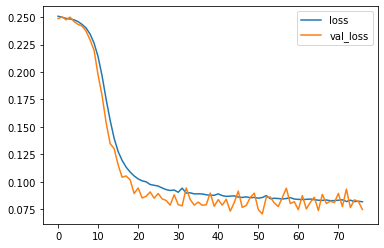

In [48]:
loss_df.plot()
#plot of loss function

In [53]:
prediction=model.predict(X_test)

In [55]:
for i in range(prediction.shape[0]):
    if prediction[i]<0.5:
        prediction[i]=0
    elif prediction[i]>=0.5:
        prediction[i]=1
# making value 0 or 1

In [56]:
sd=0
for i in range (prediction.shape[0]):
    if prediction[i]==y_test[i]:
        sd=sd+1
print(sd/len(prediction))
#accuracy of test set in 89%

0.8904109589041096
